## Phase 5 Project

* <b>Name:</b> James Benedito
* <b>Pace:</b> Part-Time 
* <b>Instructor:</b> Morgan Jones

## Project Summary

## Business Understanding

Breast cancer is a prevalent disease that affects a plethora of people, mainly women, worldwide. It accounts for 12.5% of all new cancer cases, deeming it the most common cancer in the world. In the United States, around 30% of all new cancer cases diagnosed in women are breast cancer. 1 in 8 U.S. women are expected to develop breast cancer some time in their life. Currently, more than 4 million U.S. women have a history of breast cancer. It is estimated that approximately 300,000 more women in the United States will be diagnosed with breast cancer in 2023 (https://www.breastcancer.org/facts-statistics). 

Given the statistics, it is obvious why accurate screenings are important. The sooner a doctor is able to catch breast cancer in a patient’s imaging, the more likely they can get lifesaving treatment before their disease progresses. My main stakeholders for this project are gynecologists and other medical professionals who are in charge of examining X-rays of tumors. I want them to know the top characteristics to look out for when determining whether a tumor is cancerous or not.

## Goal

For this project, my goal is to use <b>two datasets</b> to create <b>classifiers</b>. My optimal classification models for each dataset will deem the most important characteristics that determine whether a tumor is diagnosed as malignant (cancerous) or benign (non-cancerous) on both the macro-scale and micro-scale (cellular) level. 

## Data Understanding

The first dataset I will be using is called <b>breast-cancer.csv</b>, which was downloaded from Kaggle. This dataset was taken from the UC Irvine Machine Learning Repository and houses information from the Diagnostic Wisconsin Breast Cancer Database. Each row represents a cell in a tumor. Each column is a different cellular characteristic, such as mean radius and mean concavity, which was calculated from a fine needle aspirate (FNA) biopsy image of a breast mass. The target variable is the <b>diagnosis</b> column, which has an 'M' to denote 'malignant' and a 'B' to signify 'benign'.

The second dataset I will be using is called <b>mammographic_masses.csv</b>, which is a file containing a series of BIRADS evaluations for various mammographies. This dataset has several rows, each one representing a patient and their tumor. The columns are as follows: 
* <b>Score:</b> BIRADS assessment (0-6) 
* <b>Age:</b> how old a patient is (years)
* <b>Shape:</b> the shape of the mass 
                * 1=round
                * 2=oval
                * 3=lobular
                * 4=irregular
* <b>Margin:</b> the margin of the mass
                * 1=circumscribed
                * 2=microlobulated
                * 3=obscured
                * 4=ill-defined
                * 5=spiculated
* <b>Density:</b> the density of the mass
                * 1=high
                * 2=iso
                * 3=low
                * 4=fat-containing
* <b>Severity:</b> target variable (0=benign, 1=malignant)

# Part 1: Diagnostic Wisconsin Breast Cancer Dataset

# Data Exploration (Breast Cancer)

I will start by exploring the <b>breast-cancer.csv</b> file using the <b>.head()</b>, <b>.info()</b>, and <b>.describe()</b> methods. 

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [2]:
# reading breast cancer data with pandas
breast_cancer_data = pd.read_csv('breast-cancer.csv', index_col=0)
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [4]:
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From our initial exploration, we see that this dataset has <b>about 600 rows</b> and <b>around 30 columns</b>. Most of the columns house numeric data, except for the <b>diagnosis</b> column, which is our binary target variable.

# Data Preparation and Cleaning (Breast Cancer)

Following our initial exploration of the dataset, let's take a look at things we may need to address prior to modeling. One consideration is possible <b>class imbalance</b> and <b>handling null values</b>. I will preview possible class imbalance by employing the <b>.value_counts()</b> method and use the <b>.isnull().sum()</b> method to determine whether there are any missing values that need to be taken care of.

In [5]:
# checking for null values
breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# previewing possible class imbalance
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

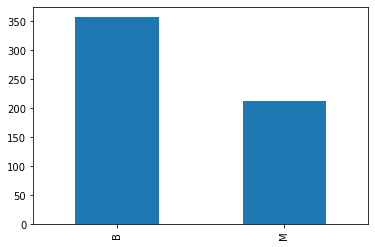

In [7]:
# graphing value_counts
breast_cancer_data.diagnosis.value_counts().plot(kind='bar')

From <b>.isnull().sum()</b>, we see that there are <b>no null values</b> that need to be handled. From <b>.value_counts()</b>, we see that there is some slight class imbalance within the dataset. A 'B' indicates a 'benign' tumor while an 'M' signifies 'malignancy'. Based on the values for each binary indicator, we see that the data is split almost 60-40 with about 60% of the tumors being classified as benign and around 40% of the tumors in the dataset being diagnosed as malignant. Because the minority class makes up <b>more than 10%</b> of the dataset, I will consider there to be no class imbalance problem that needs to be addressed. While there are no null values and class imbalance, one thing that still must be done is changing the letters in the categorical <b>diagnosis</b> column. I will use the <b>.replace()</b> method to change 'B' to an integer of '0' and 'M' to an integer of '1'. I will employ <b>.value_counts()</b> to confirm that the replacement was successful. 

In [8]:
# converting ['B', 'M'] of diagnosis column to ['0', '1']
breast_cancer_data['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
breast_cancer_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Now, we can begin the iterative modeling process.

# Iterative Modeling

During my iterative modeling process, I plan to create a series of classifiers. I will generate several <b>single decision trees</b> and <b>random forests</b> to see which model type yields the best metrics. From there, I will make my final decision on the best overall classifier for the data. 

To begin, we need to specify the target variable and predictors. Then, we need to employ <b>train_test_split()</b> to split the <b>breast_cancer_data</b> into training and test sets. We will set <b>random_state=10</b> for reproducibility and do an <b>80/20</b> split.

In [9]:
# set target variable and predictors
X = breast_cancer_data.drop('diagnosis', axis=1)
y = breast_cancer_data['diagnosis']

# perform 80-20 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

To be safe, we'll check for possible class imbalance again within the training and test sets.

In [10]:
# checking for class imbalance in training and test set
print(y_train.value_counts())
print(y_test.value_counts())

0    282
1    173
Name: diagnosis, dtype: int64
0    75
1    39
Name: diagnosis, dtype: int64


From <b>.value_counts()</b>, we see that class imbalance isn't a problem for both the training and test sets. In <b>y_train</b>, the split is about 60-40 for 'benign' and 'malignant', similar to the original dataset prior to the train-test split. For <b>y_test</b>, the split is around 65-35 for 'benign' and 'malignant', so there is also no dire class imbalance issue that needs to be considered.

## Model 1a: Baseline Decision Tree (Breast Cancer)

For my first classifier, I will make a <b>decision tree</b>. I will start with a <b>baseline decision tree</b> that has default parameters (with the exception of <b>random_state=10</b> for reproducibility). Once the classifier is trained on the training data and used to predict the test data, I will evaluate its performance using <b>accuracy_score</b> and <b>AUC</b> metrics. I will also generate a <b>confusion matrix</b> to get an understanding of the correctly predicted values versus any type 1 and type 2 errors that may arise. 

In [11]:
# train baseline decision tree classifier, then use it to predict test data

# instantiate DecisionTreeClassifier with random_state=10
dtree_baseline = DecisionTreeClassifier(random_state=10)

# fit classifier to training data
dtree_baseline.fit(X_train, y_train)

# predict test data
pred = dtree_baseline.predict(X_test) 

In [12]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Baseline Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Baseline Decision Tree Classifier: 85.96%

AUC is: 0.87


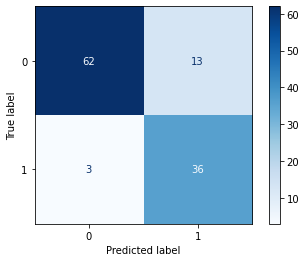

In [13]:
# generate confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dtree_baseline.classes_)
disp.plot(cmap=plt.cm.Blues);

For the <b>baseline decision tree</b>, the performance metrics are decent. The testing <b>accuracy</b> is <b>about 86%</b> and the <b>AUC</b> is <b>0.87</b>. With AUC ranging between 0.0-1.0, a value of 0.5 means a model is worthless; an AUC of 0.87 lies a great deal above this threshold. 

From the <b>confusion matrix</b>, we see that the classifier has some Type 1 and Type 2 errors, being 13 and 3, respectively, out of a test sample size of 114. It picks up true negatives (actually benign) and true positives (actually malignant) well. 

Considering the context of our business problem, <b>the model's ability to detect true positives (malignancy) is more important</b> because these represent <b>patients who have breast cancer</b>. Our goal should be <b>reducing the Type 2 error rate</b> as much as possible because these are errors where someone was <b>predicted to have a benign tumor that was actually malignant (cancerous)</b>. However, <b>bringing down the Type 1 error rate</b> is also important because we don't want to give patients a cancer scare who don't really have the disease. Comparing both error types, Type 2 errors can be more fatal; if a patient is deemed as having a non-cancerous tumor when it's actually cancerous, this will prevent them from getting potentially life-saving treatment right away. Therefore, while both error types are bad, if we had to choose, keeping the Type 2 error rate low should be our top priority.

In addition to looking at <b>test data accuracy</b>, we should also look at <b>training data accuracy</b> to see indications of potential <b>overfitting</b> or <b>underfitting</b>. We can achieve this by using the <b>.score()</b> method.

In [14]:
# compare accuracy for training and test data using .score()
print('Training Score: ', dtree_baseline.score(X_train, y_train))
print('Testing Score: ', dtree_baseline.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.8596491228070176


From <b>.score()</b>, we see that the <b>training data</b> has an <b>accuracy of 100%</b>. Because the accuracy scores for the training and test data are highly different, this is indicative of an <b>overfitting</b> issue.

## Model 1b: Hypertuned Decision Tree (Breast Cancer)

Let's create another version of the decision tree classifier called <b>dtree_tuned</b>. Instead of using the default parameters like the baseline, we can do some tree "pruning" and see if it improves the model's performance. By comparing the training and test scores earlier, we saw that the baseline decision tree did better accuracy-wise on the training data as compared to the test data, thus indicating possible overfitting. One way to reduce this overfitting issue is to adjust <b>max_depth</b>. I will determine the optimal max_depth for the training and test data by graphing various depth values against their AUC score.

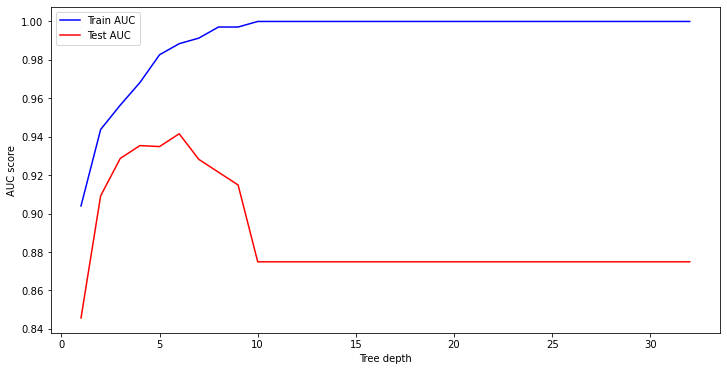

In [15]:
# identify optimal max_depth
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

From the graph, we see that the training data and test data don't have a particular max_depth value where their AUC scores align. However, the test data AUC is the highest at a max_depth around 7. Let's recreate our decision tree with a specified <b>max_depth=7</b> and see what happens.

In [16]:
# train hypertuned decision tree classifier, then use it to predict test data

# instantiate DecisionTreeClassifier with random_state=10 and max_depth=7
dtree_tuned = DecisionTreeClassifier(random_state=10, max_depth=7)

# fit classifier to training data
dtree_tuned.fit(X_train, y_train)

# predict test data
pred_tuned = dtree_tuned.predict(X_test) 

In [17]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_tuned) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_tuned)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned Decision Tree Classifier: 92.98%

AUC is: 0.93


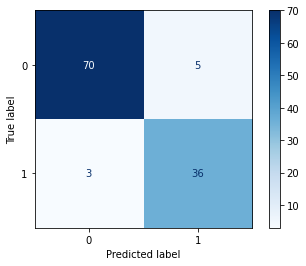

In [18]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dtree_tuned.classes_)
disp.plot(cmap=plt.cm.Blues);

In [19]:
# compare accuracy for training and test data using .score()
print('Training Score: ', dtree_tuned.score(X_train, y_train))
print('Testing Score: ', dtree_tuned.score(X_test, y_test))

Training Score:  0.9934065934065934
Testing Score:  0.9298245614035088


Based on our evaluation metrics, the <b>hypertuned decision tree</b> is an improvement from the <b>baseline decision tree</b>. The <b>accuracy</b> for <b>dtree_tuned</b> is <b>about 93%</b>, which is <b>an 8% increase</b> from <b>dtree_baseline</b>. The <b>AUC</b> also shows <b>an increase from 0.87 to 0.93</b>. 

From the <b>confusion matrix</b>, we see an <b>improvement in the Type 1 error rate</b>. The <b>number of false positives has decreased from 13 to 5</b> when comparing <b>dtree_baseline</b> and <b>dtree_tuned</b>. In terms of the <b>Type 2 error rate</b>, it is the <b>same</b>, with the <b>number of false negatives still being 3</b>. One other thing to notice is that the <b>gap between the training and test scores has decreased</b> for the hypertuned decision tree model, meaning the overfitting issue seen with <b>dtree_baseline</b> is not as apparent with <b>dtree_tuned</b>.

## Model 2a: Random Forest (Breast Cancer)

For my second classifier type, I will create a <b>random forest</b>. This will be more complex than the single decision trees generated previously because this is an ensemble method. To start, I will make a vanilla random forest with default parameters (besides <b>random_state=10</b> for reproducibility). 

In [20]:
# creating baseline random forest classifer

# instantiate RandomForestClassifier with random_state=10 for reproducibility
forest_baseline = RandomForestClassifier(random_state=10)

# fit training data
forest_baseline.fit(X_train, y_train)

# predict test data
forest_baseline_preds = forest_baseline.predict(X_test)

In [21]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, forest_baseline_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_baseline_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Random Forest Classifier: 98.25%

AUC is: 0.99


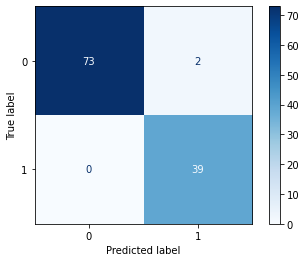

In [22]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test, forest_baseline_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_baseline.classes_)
disp.plot(cmap=plt.cm.Blues);

For <b>forest_baseline</b>, the testing <b>accuracy</b> is <b>about 98%</b> and the <b>AUC</b> is <b>0.99</b>. From the confusion matrix, we see that there are <b>only 2 false positives</b> and <b>no false negatives</b>. The <b>low rates for both Type 1 and Type 2 errors</b> is encouraging. With this model, <b>all patients that have malignant tumors would be successfully diagnosed</b>. Compared to <b>dtree_baseline</b> and <b>dtree_tuned</b>, <b>forest_baseline</b> is by far our best model based on our chosen evaluation metrics. 

Let's use the <b>.score()</b> method to compare the training and test accuracies of the <b>forest_baseline</b> classifier.

In [23]:
# compare accuracy for training and test data using .score()
print('Training Score: ', forest_baseline.score(X_train, y_train))
print('Testing Score: ', forest_baseline.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9824561403508771


Comparing the training and test scores, we see <b>no evidence of overfitting</b>. For both the training and test data, the <b>forest_baseline</b> classifier has similar accuracy metrics. 

## Model 2b: Hypertuned Random Forest (Breast Cancer)

While <b>forest_baseline</b> had strong accuracy, let's see if we can improve it any further by tuning some hyperparameters. To figure out the optimal parameters, we can use the <b>GridSearchCV</b> tool from <b>sklearn.model_selection</b>. The main parameters I will focus on are <b>n_estimators</b> and <b>max_depth</b>. Once <b>GridSearchCV</b> returns its suggestions, I will generate <b>forest_tuned</b> and evaluate its performance using the same accuracy metrics.

To start, I will generate a parameter grid called <b>param_grid</b>. 

In [24]:
# generate param_grid
forest_param_grid = {
    "n_estimators": [10, 30, 100],
    "max_depth": [None, 2, 6, 10],
}

In [25]:
# use GridSearchCV to find optimal parameters
rf_grid_search = GridSearchCV(forest_baseline, forest_param_grid, cv=3) # cv=3 for 3-fold cross validation
rf_grid_search.fit(X_train, y_train)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Optimal Parameters: {'max_depth': None, 'n_estimators': 100}


In [26]:
# instantiate RandomForestClassifier with hypertuned parameters (based on GridSearchCV results)
forest_tuned = RandomForestClassifier(random_state=10, 
                                      max_depth=None,
                                      n_estimators=100)

# fit training data
forest_tuned.fit(X_train, y_train)

# predict test data
forest_tuned_preds = forest_tuned.predict(X_test)

In [27]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned Random Forest: {:.4}%".format(accuracy_score(y_test, forest_tuned_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_tuned_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned Random Forest: 98.25%

AUC is: 0.99


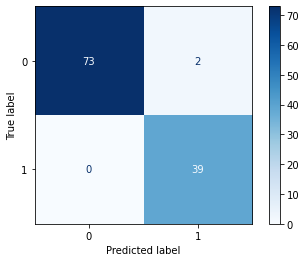

In [28]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test, forest_tuned_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_tuned.classes_)
disp.plot(cmap=plt.cm.Blues);

In [29]:
# compare accuracy for training and test data using .score()
print('Training Score: ', forest_tuned.score(X_train, y_train))
print('Testing Score: ', forest_tuned.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9824561403508771


The <b>forest_tuned</b> classifier has the <b>exact same accuracy results</b> as <b>forest_baseline</b>. This makes sense because the <b>GridSearchCV</b> results yielded <b>max_depth=None</b> and <b>n_estimators=100</b> as the optimal values for these two parameters, which is exactly what the default parameters are. Essentially, <b>there is no difference<b> between <b>forest_tuned</b> and <b>forest_baseline</b>. They are identical models.

# Best Model (Breast Cancer)

Out of the 4 models we generated, let's choose the best one. We will start by revisiting their testing accuracies. Recall that <b>forest_baseline</b> and <b>forest_tuned</b> were identical classifiers because the optimal parameters yielded from <b>GridSearchCV</b> ended up being the default parameters. Therefore, to avoid repetition, we will just use <b>forest_baseline</b>. 

In [30]:
# comparing testing accuracy for dtree_baseline, dtree_tuned, forest_baseline
# forest_baseline and forest_tuned were identical models

# decision trees
print("Testing Accuracy for Baseline Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))
print("Testing Accuracy for Hypertuned Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_tuned) * 100))

# random forest model
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, forest_baseline_preds) * 100))

Testing Accuracy for Baseline Decision Tree Classifier: 85.96%
Testing Accuracy for Hypertuned Decision Tree Classifier: 92.98%
Testing Accuracy for Random Forest Classifier: 98.25%


We see that the highest testing accuracy was for the random forest classifier. We will proceed with <b>forest_baseline</b> and choose it as our <b>final model</b>. 

# Final Model (Breast Cancer)

As we have seen, the <b>accuracy</b> of our final model, <b>forest_baseline</b>, is <b>about 98%</b> and the <b>AUC</b> is <b>0.99</b>. Let's look at some other evaluation metrics using <b>classification_report</b>. 

In [31]:
# print classification report for final model, forest_baseline
print(classification_report(y_test, forest_baseline_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



From the classification report, we see that the metrics were similar for both classes (benign and malignant tumors) across the board. 

The <b>precision</b>, which is a measure of true positives versus the total number of predicted positives, was <b>100% for benign tumors</b> and <b>95% for malignant tumors</b>. 

<b>Recall</b>, which is a measure of positives that were correctly identified, was <b>97% for the benign</b> class and <b>100% for the malignant</b> class. 

Lastly, the <b>f1_score</b>, which takes both precision and recall into account and is the percent of positive predictions that were correct, was <b>99% for benign</b> and <b>97% for malignant</b> tumors. 

Because the precision, recall, and f1_score metrics were similar values for both benign and malignant tumors, this is further proof that <b>class imbalance was not an issue</b>. On top of that, the <b>accuracy</b> of the chosen model was <b>98%</b> on the test data. More importantly, there were <b>no Type 2 errors (false negatives)</b>. This was of utmost importance because patients with breast cancer need to be properly diagnosed. All in all, the <b>forest_baseline</b> classifier is strong in many evaluation areas.

For our final model, let's go ahead and plot the <b>most important features</b>. From here, we can craft our suggestions for the stakeholder.

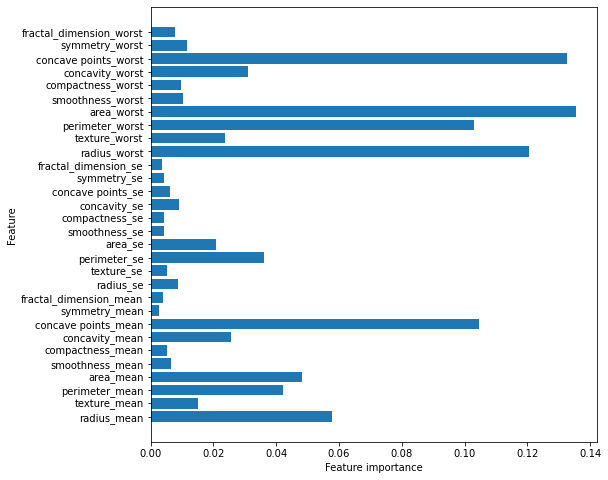

In [32]:
# create function for plotting most important features

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# plot most important features for forest_baseline classifier
plot_feature_importances(forest_baseline)

From the bar graph, we see that the three most important features in our classifer are <b>area_worst</b>, <b>concave points_worst</b>, and <b>radius_worst</b>. 
* The <b>area_worst</b> column represents a cell's worst area 
* The <b>concave points_worst</b> column represents a cell's greatest number of concave points. The larger the quantity of concave points, the more likely a cell is to be malignant.   
* The <b>radius_worst</b> column represents a cell's worst radius

Let's create visuals for each of these features to get a better understanding of how they compare for benign and malignant cells. 

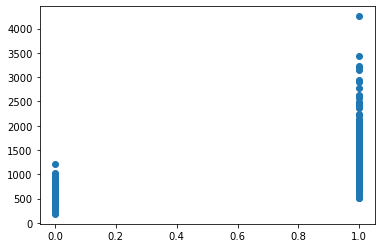

In [33]:
# scatterplot for area_worst
# 0 is for 'B' and 1 is for 'M'
plt.scatter(x=breast_cancer_data['diagnosis'], y=breast_cancer_data['area_worst'])
plt.show()

In [34]:
# comparing area_worst means between diagnosis categories
# 0 is for 'B' and 1 is for 'M'
breast_cancer_data['area_worst'].groupby(breast_cancer_data['diagnosis']).mean()

diagnosis
0     558.899440
1    1422.286321
Name: area_worst, dtype: float64

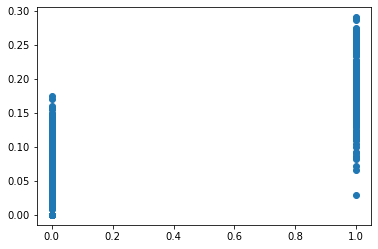

In [35]:
# scatterplot for concave points_worst
# 0 is for 'B' and 1 is for 'M'
plt.scatter(x=breast_cancer_data['diagnosis'], y=breast_cancer_data['concave points_worst'])
plt.show()

In [36]:
# comparing concave points_worst means between diagnosis categories
# 0 is for 'B' and 1 is for 'M'
breast_cancer_data['concave points_worst'].groupby(breast_cancer_data['diagnosis']).mean()

diagnosis
0    0.074444
1    0.182237
Name: concave points_worst, dtype: float64

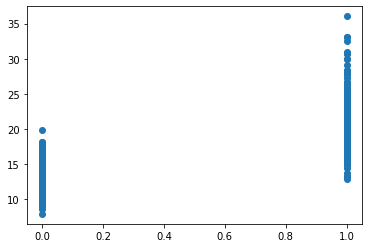

In [37]:
# scatterplot for radius_worst
# 0 is for 'B' and 1 is for 'M'
plt.scatter(x=breast_cancer_data['diagnosis'], y=breast_cancer_data['radius_worst'])
plt.show()

In [38]:
# comparing radius_worst means between diagnosis categories
# 0 is for 'B' and 1 is for 'M'
breast_cancer_data['radius_worst'].groupby(breast_cancer_data['diagnosis']).mean()

diagnosis
0    13.379801
1    21.134811
Name: radius_worst, dtype: float64

For the <b>area_worst</b> scatterplot, 

For the <b>concave points_worst</b> scatterplot, 

For the <b>radius_worst</b> scatterplot, 

# Part 2: Mammographic Masses Dataset

# Data Exploration (Mammographic Masses)

Similar to the first dataset, I will begin my exploration of the <b>mammographic_masses.csv</b> file using the <b>.head()</b> and <b>.info()</b> methods. 

In [39]:
# reading mammographic masses data with pandas
mammographic_masses_data = pd.read_csv('mammographic_masses.csv')
mammographic_masses_data.head()

,Score,Age,Shape,Margin,Density,Malignant
0,0,45,2,4,3,0
1,0,69,4,5,3,1
2,0,58,4,4,3,0
3,0,72,4,3,3,1
4,0,71,4,4,3,1


In [40]:
mammographic_masses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Score      961 non-null    object
 1   Age        961 non-null    object
 2   Shape      961 non-null    object
 3   Margin     961 non-null    object
 4   Density    961 non-null    object
 5   Malignant  961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


From <b>.info()</b>, we see that the <b>mammographic masses</b> dataset has <b>961 rows</b> and <b>6 columns</b>. Most of the columns are of <b>object</b> dtype. The target variable is a column called <b>'malignant'</b>, which has a '0' to indicate that a given patient's tumor is 'benign' and a '1' to deem their tumor as 'malignant'.

# Data Preparation and Cleaning (Mammographic Masses)

Just like with our first dataset, let's now take a look at possible <b>class imbalance</b> and <b>null values</b> for <b>mammographic_masses.csv</b>. I will use the <b>.value_counts()</b> method to check for class imbalance within the binary target variable; then, I will go column by column to see if any null values exist in the other five columns, once again employing <b>.value_counts()</b>.

In [41]:
# checking for possible class imbalance
# '0' for 'benign' and '1' for 'malignant'
mammographic_masses_data['Malignant'].value_counts()

0    516
1    445
Name: Malignant, dtype: int64

<AxesSubplot:>

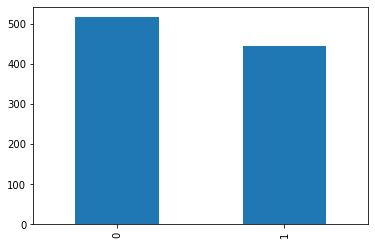

In [42]:
# graphing value_counts
# '0' for 'benign' and '1' for 'malignant'
mammographic_masses_data.Malignant.value_counts().plot(kind='bar')

From <b>.value_counts()</b> and the bar chart, we see that there is <b>no class imbalance</b> issue. Now, let's go column by column to check for any possible null values.

In [43]:
# checking for null values
print(mammographic_masses_data['Score'].value_counts())
print('')
print(mammographic_masses_data['Age'].value_counts())
print('')
print(mammographic_masses_data['Shape'].value_counts())
print('')
print(mammographic_masses_data['Margin'].value_counts())
print('')
print(mammographic_masses_data['Density'].value_counts())

4     547
5     345
3      36
2      14
6      11
0       5
?       2
55      1
Name: Score, dtype: int64

59    36
67    32
57    32
66    31
46    28
      ..
88     1
20     1
93     1
82     1
96     1
Name: Age, Length: 74, dtype: int64

4    400
1    224
2    211
3     95
?     31
Name: Shape, dtype: int64

1    357
4    280
5    136
3    116
?     48
2     24
Name: Margin, dtype: int64

3    798
?     76
2     59
1     16
4     12
Name: Density, dtype: int64


By looking at the other five columns, we see some <b>null values</b> in the form of question marks ('?'). We need to take care of these before moving forward. I will use <b>.replace()</b> to change '?' to 'NaN'. That way, when I employ the <b>.dropna()</b> method, these null values will be detected and removed from the dataset. In addition, I want to convert the dtype for all columns to <b>int</b>, so I will deploy the <b>.astype()</b> method to achieve this. 

In [44]:
# replace '?' with 'NaN'
# use .dropna() to drop rows with null values
# use .astype(int) to convert dtype for all columns to int
mammographic_masses_data = mammographic_masses_data.replace({'?': np.nan}).dropna().astype(int)
mammographic_masses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 958
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Score      830 non-null    int32
 1   Age        830 non-null    int32
 2   Shape      830 non-null    int32
 3   Margin     830 non-null    int32
 4   Density    830 non-null    int32
 5   Malignant  830 non-null    int32
dtypes: int32(6)
memory usage: 25.9 KB


In [45]:
# go through the five non-target columns again to see that '?' has disappeared
print(mammographic_masses_data['Score'].value_counts())
print('')
print(mammographic_masses_data['Age'].value_counts())
print('')
print(mammographic_masses_data['Shape'].value_counts())
print('')
print(mammographic_masses_data['Margin'].value_counts())
print('')
print(mammographic_masses_data['Density'].value_counts())

4     468
5     316
3      24
6       9
2       7
0       5
55      1
Name: Score, dtype: int64

67    30
59    29
66    28
57    27
46    25
      ..
96     1
26     1
93     1
88     1
18     1
Name: Age, Length: 72, dtype: int64

4    379
1    190
2    180
3     81
Name: Shape, dtype: int64

1    320
4    254
5    127
3    106
2     23
Name: Margin, dtype: int64

3    755
2     56
1     11
4      8
Name: Density, dtype: int64


Most of the columns look good. However, the <b>Score</b> column has one row with a value of 55. We can infer that this was a typo and should have been 5 based on the BIRADS scale. Let's go ahead and fix this using <b>.replace()</b>.

In [46]:
# replacing 55 with 5 for typo row in Score column
mammographic_masses_data['Score'] = mammographic_masses_data['Score'].replace(55, 5)
mammographic_masses_data['Score'].value_counts()

4    468
5    317
3     24
6      9
2      7
0      5
Name: Score, dtype: int64

With the data properly cleaned, we can now begin our iterative modeling process for the <b>mammographic masses</b> dataset.

# Iterative Modeling (Mammographic Masses)

Just like with the breast cancer dataset, prior to our modeling, we have to specify our target variable and predictors. Then, we need to employ <b>train_test_split()</b> to split the <b>mammographic_masses_data</b> into training and test sets. We will set <b>random_state=10</b> for reproducibility and do an <b>80/20</b> split.

In [47]:
# set target variable and predictors
X_mm = mammographic_masses_data.drop('Malignant', axis=1)
y_mm = mammographic_masses_data['Malignant']

# perform 80-20 train_test_split
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_mm, y_mm, test_size=0.20, random_state=10)

In [48]:
# checking for class imbalance in training and test set
print(y_train_mm.value_counts())
print(y_test_mm.value_counts())

0    338
1    326
Name: Malignant, dtype: int64
0    89
1    77
Name: Malignant, dtype: int64


The <b>mammographic_masses_data</b> file has been properly divided into training and test sets. There is no class imbalance issue that exists with either set. Now, we can start modeling. 

## Model 3a: Baseline Decision Tree (Mammographic Masses)

In [49]:
# train baseline decision tree classifier, then use it to predict test data

# instantiate DecisionTreeClassifier with random_state=10
dtree_baseline_mm = DecisionTreeClassifier(random_state=10)

# fit classifier to training data
dtree_baseline_mm.fit(X_train_mm, y_train_mm)

# predict test data
pred_mm = dtree_baseline_mm.predict(X_test_mm) 

In [50]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Baseline Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test_mm, pred_mm) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, pred_mm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Baseline Decision Tree Classifier: 80.12%

AUC is: 0.8


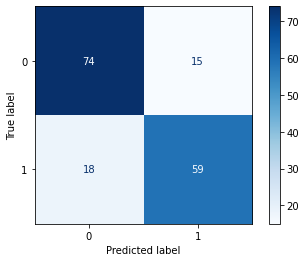

In [51]:
# generate confusion matrix
cnf_matrix = confusion_matrix(y_test_mm, pred_mm)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dtree_baseline_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

For the <b>baseline decision tree</b>, the testing <b>accuracy</b> is <b>about 80%</b> and the <b>AUC</b> is <b>0.8</b>. From the <b>confusion matrix</b>, we see that the classifier has Type 1 and Type 2 errors, being 15 and 18, respectively, out of a test sample size of 166. The model does a solid job of detecting true negatives (actually benign) and true positives (actually malignant). 

Revisiting our business problem stated earlier, <b>the model's ability to detect true positives (malignancy) is more important</b>; our priority should be <b>reducing the Type 2 error rate</b> because Type 2 errors represent patients who were <b>predicted to have a benign tumor that was actually malignant (cancerous)</b>. 

Let's compare the <b>accuracy</b> of our training and test sets to see if there's potential overfitting or underfitting.

In [52]:
# compare accuracy for training and test data using .score()
print('Training Score: ', dtree_baseline_mm.score(X_train_mm, y_train_mm))
print('Testing Score: ', dtree_baseline_mm.score(X_test_mm, y_test_mm))

Training Score:  0.9382530120481928
Testing Score:  0.8012048192771084


By comparing the training and test scores, we see that the accuracy for the training set was higher than the test set, being around 0.94 and 0.80, respectively. This is an indicator that the model is <b>overfitting</b>. 

## Model 3b: Hypertuned Decision Tree (Mammographic Masses)

Let's create a secondary version of <b>dtree_baseline_mm</b> called <b>dtree_tuned_mm</b>. We will address the overfitting issue highlighted previously by adjusting <b>max_depth</b>. To determine the optimal max_depth for the training and test data, I will graph various depth values against their AUC score, just like I did earlier for the breast cancer dataset.

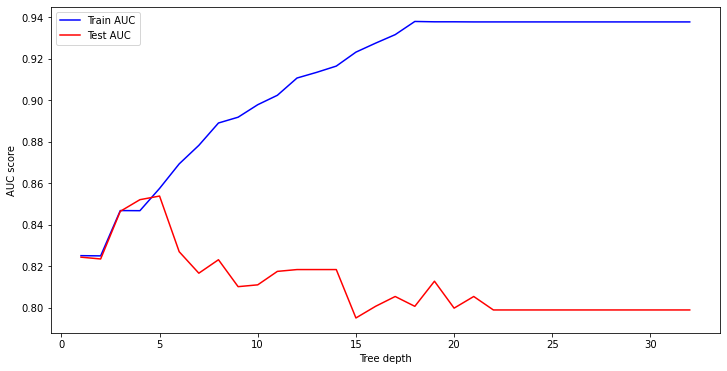

In [53]:
# identify optimal max_depth
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=10)
    dt.fit(X_train_mm, y_train_mm)
    train_pred = dt.predict(X_train_mm)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_mm, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test_mm)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

From the AUC graph, the optimal max_depth value seems to be around 5, which is where the training and test sets coincide. Therefore, I will set <b>max_depth=5</b> and see what results I end up yielding for <b>dtree_tuned_mm</b> 

In [54]:
# train hypertuned decision tree classifier, then use it to predict test data

# instantiate DecisionTreeClassifier with random_state=10 and max_depth=5
dtree_tuned_mm = DecisionTreeClassifier(random_state=10, max_depth=5)

# fit classifier to training data
dtree_tuned_mm.fit(X_train_mm, y_train_mm)

# predict test data
pred_tuned_mm = dtree_tuned_mm.predict(X_test_mm) 

In [55]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test_mm, pred_tuned_mm) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, pred_tuned_mm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned Decision Tree Classifier: 85.54%

AUC is: 0.85


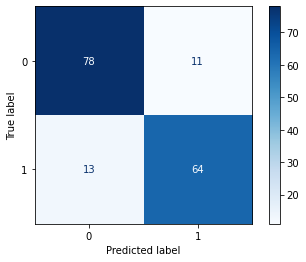

In [56]:
# generate confusion matrix
cnf_matrix = confusion_matrix(y_test_mm, pred_tuned_mm)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dtree_tuned_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

In [57]:
# compare accuracy for training and test data using .score()
print('Training Score: ', dtree_tuned_mm.score(X_train_mm, y_train_mm))
print('Testing Score: ', dtree_tuned_mm.score(X_test_mm, y_test_mm))

Training Score:  0.858433734939759
Testing Score:  0.8554216867469879


Compared to <b>dtree_baseline_mm</b>, <b>dtree_tuned_mm</b> shows improvement in <b>accuracy</b> and <b>AUC</b>. The accuracy for the test set has increased from 80% to <b>about 86%</b> and the AUC has risen from 0.8 to <b>0.85</b>. In addition, overfitting is no longer an issue, since the training and testing scores are around the same value. The <b>confusion matrix</b> displays a slight decrease in Type 1 and Type 2 errors. The number of <b>false positives</b> has gone down from 15 to 11. Similarly, the number of <b>false negatives</b> has decreased from 18 to 13. The improvements in this regard are solid; however, considering we are dealing with real patients, that means there are still 13 of them who are being diagnosed with a benign tumor that is actually malignant. While we are making progress in the right direction, there remains room to improve the classification model to a further extent. 

## Model 4a: Random Forest (Mammographic Masses)

Let's increase the complexity of the classifier to see if we yield better results. I will create a <b>baseline random forest</b> for the <b>mammographic masses</b> dataset with default parameters and <b>random_state=10</b>. Then, as per usual, I will look at the model's <b>accuracy</b>, <b>AUC</b>, and <b>confusion matrix</b>. 

In [58]:
# creating baseline random forest classifer

# instantiate RandomForestClassifier with random_state=10 for reproducibility
forest_baseline_mm = RandomForestClassifier(random_state=10)

# fit training data
forest_baseline_mm.fit(X_train_mm, y_train_mm)

# predict test data
forest_baseline_mm_preds = forest_baseline_mm.predict(X_test_mm)

In [59]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test_mm, forest_baseline_mm_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, forest_baseline_mm_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Random Forest Classifier: 84.34%

AUC is: 0.84


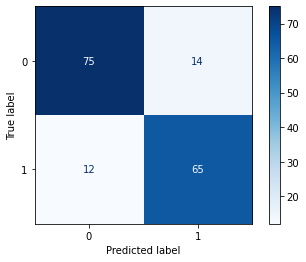

In [60]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test_mm, forest_baseline_mm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_baseline_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

In [61]:
# compare accuracy for training and test data using .score()
print('Training Score: ', forest_baseline_mm.score(X_train_mm, y_train_mm))
print('Testing Score: ', forest_baseline_mm.score(X_test_mm, y_test_mm))

Training Score:  0.9382530120481928
Testing Score:  0.8433734939759037


For <b>forest_baseline_mm</b>, the <b>accuracy</b> on the testing data was <b>around 84%</b> and the <b>AUC</b> was <b>0.84</b>. From the <b>confusion matrix</b>, we see <b>14 Type 1 errors</b> and <b>12 Type 2 errors</b>. These metrics are an indicator that the model is better than random guessing; however, there is still room for improvement. From the training an test scores, we see that the training accuracy was higher than the testing accuracy, being around 94% and 84%, respectively. There is evidence of <b>slight overfitting</b>, which can be taken care of by tuning some hyperparameters.

## Model 4b: Hypertuned Random Forest (Mammographic Masses)

Moving forward from <b>forest_baseline_mm</b>, let's create a hypertuned version of the model called <b>forest_tuned_mm</b>. To find optimal parameters, we will use a <b>GridSearchCV</b> method. The <b>forest_param_grid</b> created earlier for the <b>breast cancer</b> dataset will be utilized. Once GridSearchCV returns the best parameters in the parameter grid for <b>max_depth</b> and <b>n_estimators</b>, we will generate <b>forest_tuned_mm</b> with those particular values specified.

In [62]:
# use GridSearchCV to find optimal parameters
rf_grid_search_mm = GridSearchCV(forest_baseline_mm, forest_param_grid, cv=3) # cv=3 for 3-fold cross validation
rf_grid_search_mm.fit(X_train_mm, y_train_mm)

print(f"Optimal Parameters: {rf_grid_search_mm.best_params_}")

Optimal Parameters: {'max_depth': 2, 'n_estimators': 100}


In [63]:
# instantiate RandomForestClassifier with hypertuned parameters (based on GridSearchCV results)
forest_tuned_mm = RandomForestClassifier(random_state=10, 
                                      max_depth=2,
                                      n_estimators=100)

# fit training data
forest_tuned_mm.fit(X_train_mm, y_train_mm)

# predict test data
forest_tuned_mm_preds = forest_tuned_mm.predict(X_test_mm)

In [64]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned Random Forest Classifier: {:.4}%".format(accuracy_score(y_test_mm, forest_tuned_mm_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, forest_tuned_mm_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned Random Forest Classifier: 86.75%

AUC is: 0.87


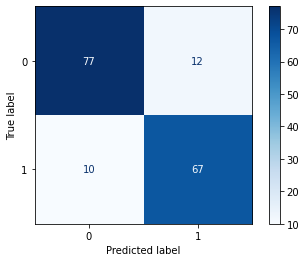

In [65]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test_mm, forest_tuned_mm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_tuned_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

In [66]:
# compare accuracy for training and test data using .score()
print('Training Score: ', forest_tuned_mm.score(X_train_mm, y_train_mm))
print('Testing Score: ', forest_tuned_mm.score(X_test_mm, y_test_mm))

Training Score:  0.8448795180722891
Testing Score:  0.8674698795180723


The <b>forest_tuned_mm</b> classifier had an <b>accuracy</b> of <b>about 87%</b> and the <b>AUC</b> was <b>0.87</b>. This is a slight improvement from <b>forest_baseline_mm</b>, which had an accuracy of around 84% and an AUC of 0.84. From the <b>confusion matrix</b>, we see that <b>Type 1 and Type 2 errors reduced a bit</b>. However, despite the improvements, we see from our <b>false negatives</b> section of the matrix that 10 patients are still being diagnosed as having benign tumors that are actually malignant. Putting it in this context, we should continue our iterative modeing process to see if we can get even better results. On the bright side, <b>forest_tuned_mm</b> is the best model we've yielded so far for the <b>mammographic masses</b> dataset (in terms of accuracy). From our training and testing scores, we also see no more evidence of overfitting, since they are closer to each other in quantity.

## Model 5a: KNN (Mammographic Masses)

Following our <b>decision tree</b> and <b>random forest</b> models for the <b>mammographic masses</b> dataset, let's try another classifier type: <b>k-nearest neighbors (KNN)</b>. Prior to modeling, the data needs to be scaled; we will achieve this scaling using <b>StandardScaler()</b> from the <b>sklearn.preprocessing</b> package.

In [67]:
# scaling X_train_mm and X_test_mm using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_mm)

X_train_mm_scaled = scaler.transform(X_train_mm)
X_test_mm_scaled = scaler.transform(X_test_mm)

Now that the data has been properly scaled, we can begin modeling. Let's create a baseline KNN model called <b>knn_baseline_mm</b>. Once the classifier has been generated, we will look at <b>accuracy</b>, <b>AUC</b>, and a <b>confusion matrix</b> to evaluate its performance.

In [68]:
# creating baseline kNN model

# instantiate kNN model
knn_baseline_mm = KNeighborsClassifier()

# fit classifier on training data
knn_baseline_mm.fit(X_train_mm_scaled, y_train_mm)

# predict test data
test_preds_mm = knn_baseline_mm.predict(X_test_mm_scaled)

In [69]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Baseline KNN Classifier: {:.4}%".format(accuracy_score(y_test_mm, test_preds_mm) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, test_preds_mm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Baseline KNN Classifier: 87.95%

AUC is: 0.88


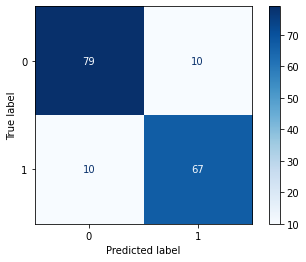

In [70]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test_mm, test_preds_mm)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn_baseline_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

In [71]:
# compare accuracy for training and test data using .score()
print('Training Score: ', knn_baseline_mm.score(X_train_mm_scaled, y_train_mm))
print('Testing Score: ', knn_baseline_mm.score(X_test_mm_scaled, y_test_mm))

Training Score:  0.8509036144578314
Testing Score:  0.8795180722891566


Looking at our model results, <b>knn_baseline_mm</b> had an <b>accuracy</b> of <b>around 88%</b> and an <b>AUC</b> of <b>0.88</b>. The <b>confusion matrix</b> shows <b>10 Type 1 errors</b> and <b>10 Type 2 errors</b>. The 10 false negatives are the biggest concern because this value represents 10 patients who have breast cancer who weren't diagnosed. Comparing <b>knn_baseline_mm</b> to the <b>decision tree</b> models and <b>random forest</b> classifiers created earlier, this model we just made has the best performance, in terms of accuracy. Between the training and testing scores, we see that the baseline KNN performed better with the testing data, having an accuracy of about 88%, whereas on the training data, it had an accuracy of around 85%. This is an indicator of <b>underfitting</b>. Let's try to address this problem by tuning some hyperparameters.

# Model 5b: Hypertuned KNN (Mammographic Masses)

One of the most important parameters in KNN is <b>n_neighbors</b>. Let's find the optimal value for this parameter by graphing it against accuracy.  

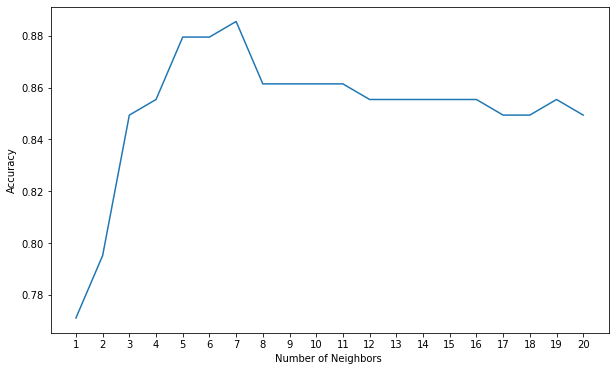

In [72]:
# Code Source: https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning#k-Nearest-Neighbors

# find optimal value for k (n_neighbors) 

# calculating accuracy with different n_neighbors values
mean_acc = np.zeros(20)
for i in range(1, 21):
    # train models and predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_mm_scaled, y_train_mm)
    yhat = knn.predict(X_test_mm_scaled)
    mean_acc[i-1] = metrics.accuracy_score(y_test_mm, yhat)

# graphing n_neighbors vs accuracy
loc = np.arange(1, 21, step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1, 21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

From our graph above, we see that the <b>accuracy</b> is at its peak when <b>n_neighbors=7</b>. Let's go ahead and create a version of our KNN classifier called <b>knn_tuned_mm</b>, which changes the value of n_neighbors to 7. Then, we will use the same evaluation metrics to determine model performance. 

In [73]:
# creating hypertuned kNN model

# instantiate KNeighborsClassifier with n_neighbors=7
knn_tuned_mm = KNeighborsClassifier(n_neighbors=7)

# fit classifier on training data
knn_tuned_mm.fit(X_train_mm_scaled, y_train_mm)

# predict on the test set
knn_tuned_mm_preds = knn_tuned_mm.predict(X_test_mm_scaled)

In [74]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned KNN Classifier: {:.4}%".format(accuracy_score(y_test_mm, knn_tuned_mm_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_mm, knn_tuned_mm_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned KNN Classifier: 88.55%

AUC is: 0.88


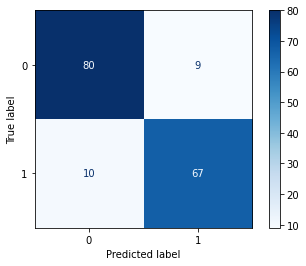

In [75]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test_mm, knn_tuned_mm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn_tuned_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

In [76]:
# compare accuracy for training and test data using .score()
print('Training Score: ', knn_tuned_mm.score(X_train_mm_scaled, y_train_mm))
print('Testing Score: ', knn_tuned_mm.score(X_test_mm_scaled, y_test_mm))

Training Score:  0.8418674698795181
Testing Score:  0.8855421686746988


Though the <b>accuracy increased slightly</b> for <b>knn_tuned_mm</b> to <b>around 88.6%</b>, we see that the <b>number of Type 2 errors did not decrease at all</b>. Furthermore, the gap between the training and test score has risen, indicating that there is still an <b>underfitting</b> issue. In fact, this problem became more pronounced, with the training accuracy decrease from what it was in <b>knn_baseline_mm</b>. This indicates that more improvements can be made.

## Model 6a: XGBoost Model (Mammographic Masses)

So far, for the <b>mammographic masses</b> dataset, we've tried <b>decision trees</b>, <b>random forests</b>, and <b>KNN models</b>. Let's see what results we get with an <b>XGBoost</b> model. I will create a vanilla classifier called <b>XGB_baseline_mm</b>, which uses default parameters. Then, I will compare <b>training accuracy</b> and <b>testing accuracy</b> and look at a <b>confusion matrix</b> to evaluate its performance.

In [77]:
# instantiate XGBClassifier
XGB_baseline_mm = XGBClassifier()

# fit XGBClassifier
XGB_baseline_mm.fit(X_train_mm, y_train_mm)

# predict on training and test sets
XGB_training_preds = XGB_baseline_mm.predict(X_train_mm)
XGB_test_preds = XGB_baseline_mm.predict(X_test_mm)

# accuracy of training and test sets
training_accuracy = accuracy_score(y_train_mm, XGB_training_preds)
test_accuracy = accuracy_score(y_test_mm, XGB_test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Testing accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 91.42%
Testing accuracy: 81.93%


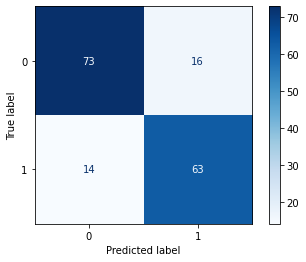

In [78]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test_mm, XGB_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=XGB_baseline_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

By comparing the <b>training accuracy (91.42%)</b> and <b>testing accuracy (81.93%)</b>, we see that <b>XGB_baseline_mm</b> performed better on the training set by a relatively large amount (10% difference in accuracy). From the <b>confusion matrix</b>, we see <b>16 Type 1 errors</b> and <b>14 Type 2 errors</b>. If we deployed this model, <b>14 patients would have been falsely given a benign when their tumors were really malignant</b>. 

## Model 6b: Hypertuned XGBoost Model (Mammographic Masses)

Similar to the other models, let's create a second version of <b>XGB_baseline_mm</b> called <b>XGB_tuned_mm</b>. I will generate a parameter grid called <b>param_grid_XGB</b> and use <b>GridSearchCV</b> to find optimal values for each of the parameters. Then, I will look at <b>training accuracy</b> and <b>testing accuracy</b>, as well as a <b>confusion matrix</b> to see if any improvements were made in the <b>Type 2 error rate</b>.

In [79]:
# parameter grid for XGBoost
param_grid_XGB = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [81]:
# instantiate classifier with GridSearchCV
XGB_tuned_mm = GridSearchCV(XGB_baseline_mm, param_grid_XGB, scoring='accuracy', cv=None, n_jobs=1)

# fit classifier on training data
XGB_tuned_mm.fit(X_train_mm, y_train_mm)

# store and print best parameters yielded by GridSearchCV
best_parameters = XGB_tuned_mm.best_params_

print('Optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

# predict training and test data
XGB_training_tuned_preds = XGB_tuned_mm.predict(X_train_mm)
XGB_test_tuned_preds = XGB_tuned_mm.predict(X_test_mm)

# accuracy for training and test data
training_accuracy = accuracy_score(y_train_mm, XGB_training_tuned_preds)
test_accuracy = accuracy_score(y_test_mm, XGB_test_tuned_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Testing accuracy: {:.4}%'.format(test_accuracy * 100))

Optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7

Training Accuracy: 86.75%
Testing accuracy: 84.94%


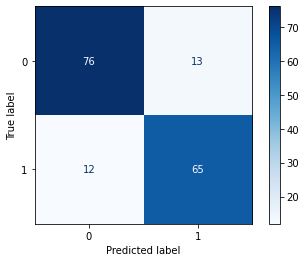

In [82]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test_mm, XGB_test_tuned_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=XGB_tuned_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

Compared to <b>XGB_baseline_mm</b>, <b>XGB_tuned_mm</b> had better <b>testing accuracy</b>, being <b>84.94%</b>. In addition, while the <b>training accuracy decreased</b>, the overfitting issue seen with the baseline was less pronounced with the tuned classifier. From the <b>confusion matrix</b>, we see <b>13 Type 1 errors</b> and <b>12 Type 2 errors</b>. The <b>Type 2 error rate went down</b>, meaning less patients are getting an incorrect benign diagnosis when they have a malignant tumor. However, when considering the previous model types we used (<b>decision trees</b>, <b>random forests</b>, and <b>KNN models</b>), the <b>KNN models performed better than the XGBoost classifiers</b> and still had the best results overall, as far as accuracy is concerned.

# Best Model (Mammographic Masses)

For the <b>mammographic masses</b> dataset, we had <b>8 models</b> in total. Let's revisit their testing accuracies, compare them, and choose the best one to move forward with. 

In [83]:
# comparing testing accuracy for all 8 models 

# decision trees
print("Testing Accuracy for Baseline Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test_mm, pred_mm) * 100))
print("Testing Accuracy for Hypertuned Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test_mm, pred_tuned_mm) * 100))

# random forests
print("Testing Accuracy for Baseline Random Forest Classifier: {:.4}%".format(accuracy_score(y_test_mm, forest_baseline_mm_preds) * 100))
print("Testing Accuracy for Hypertuned Random Forest Classifier: {:.4}%".format(accuracy_score(y_test_mm, forest_tuned_mm_preds) * 100))

# KNN models
print("Testing Accuracy for Baseline KNN Classifier: {:.4}%".format(accuracy_score(y_test_mm, test_preds_mm) * 100))
print("Testing Accuracy for Hypertuned KNN Classifier: {:.4}%".format(accuracy_score(y_test_mm, knn_tuned_mm_preds) * 100))

# XGBoost models
print("Testing Accuracy for Baseline XGB Classifier: {:.4}%".format(accuracy_score(y_test_mm, XGB_test_preds) * 100))
print("Testing Accuracy for Hypertuned XGB Classifier: {:.4}%".format(accuracy_score(y_test_mm, XGB_test_tuned_preds) * 100))

Testing Accuracy for Baseline Decision Tree Classifier: 80.12%
Testing Accuracy for Hypertuned Decision Tree Classifier: 85.54%
Testing Accuracy for Baseline Random Forest Classifier: 84.34%
Testing Accuracy for Hypertuned Random Forest Classifier: 86.75%
Testing Accuracy for Baseline KNN Classifier: 87.95%
Testing Accuracy for Hypertuned KNN Classifier: 88.55%
Testing Accuracy for Baseline XGB Classifier: 81.93%
Testing Accuracy for Hypertuned XGB Classifier: 84.94%


The Top 3-performing models were <b>knn_tuned_mm</b>, <b>knn_baseline_mm</b>, and <b>forest_tuned_mm</b>. Let's take a look at the <b>confusion matrix</b> for each of these classifiers to compare their <b>Type 2 error rate</b>. Again, Type 2 errors are the most important to avoid because they represent patients who have a malignant tumor that was diagnosed as benign. 

In [ ]:
# knn_tuned_mm
cnf_matrix = confusion_matrix(y_test_mm, knn_tuned_mm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn_tuned_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

# knn_baseline_mm
cnf_matrix = confusion_matrix(y_test_mm, test_preds_mm)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=knn_baseline_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

# forest_tuned_mm
cnf_matrix = confusion_matrix(y_test_mm, forest_tuned_mm_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_tuned_mm.classes_)
disp.plot(cmap=plt.cm.Blues);

We see that the highest testing accuracy out of the 8 models is <b>knn_tuned_mm</b>. Let's choose this as our <b>final model</b>.

# Final Model (Mammographic Masses)

We have already seen that <b>knn_tuned_mm</b> had an <b>accuracy of about 88.6%</b> and an <b>AUC of 0.88</b>. Let's print out a <b>classification report</b> to see how it performed in terms of other metrics.

In [87]:
# print classification report for final model, knn_tuned_mm
print(classification_report(y_test_mm, forest_tuned_mm_preds))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        89
           1       0.85      0.87      0.86        77

    accuracy                           0.87       166
   macro avg       0.87      0.87      0.87       166
weighted avg       0.87      0.87      0.87       166



From the classification report, we see that the metrics were similar for both classes (benign and malignant tumors) across the board. 

The <b>precision</b>, which is a measure of true positives versus the total number of predicted positives, was <b>89% for benign tumors</b> and <b>88% for malignant tumors</b>. 

<b>Recall</b>, which is a measure of positives that were correctly identified, was <b>90% for the benign</b> class and <b>87% for the malignant</b> class. 

Lastly, the <b>f1_score</b>, which takes both precision and recall into account and is the percent of positive predictions that were correct, was <b>89% for benign</b> and <b>88% for malignant</b> tumors. 

Because the precision, recall, and f1_score metrics were similar values for both benign and malignant tumors, this is further proof that <b>class imbalance was not an issue</b>. On top of that, the <b>accuracy</b> of the chosen model was <b>88.6%</b> on the test data. There were <b>10 Type 2 errors (false negatives)</b>. This was of utmost importance because patients with breast cancer need to be properly diagnosed. All in all, the <b>knn_tuned_mm</b> classifier is solid in many areas, but still isn't the best when thinking in context.

Now let's look at the classifier's <b>most important features</b>. We will deploy the <b>plot_feature_importances()</b> function created earlier for the first dataset.

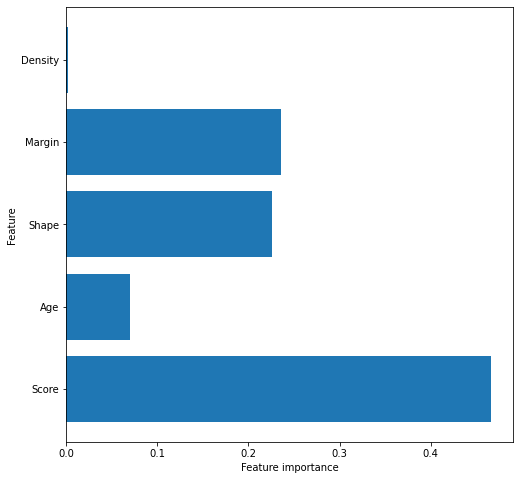

In [86]:
# plot most important features for knn_tuned_mm classifier

# create function for plotting most important features

def plot_feature_importances_mm(model):
    n_features = X_train_mm.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_mm.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances_mm(forest_tuned_mm)

## Conclusions

To summarize: the final model that we selected for the <b>breast cancer</b> dataset was <b>forest_baseline</b>. This model had an <b>accuracy</b> of <b>about 98%</b> and an <b>AUC</b> of <b>0.99</b>. The <b>most important features</b> according to this classifier were: <b>area_worst</b>, <b>concave points_worst</b>, and <b>radius_worst</b>. 

For the <b>mammographic masses</b> dataset, the final model we chose was <b>knn_tuned_mm</b>. This model had an <b>accuracy</b> of <b>about 88.6%</b> and an <b>AUC</b> of <b>0.88</b>. 
 
Based on my classifiers, my suggestions are:

## Limitations and Future Improvements

The classifier for the <b>breast cancer</b> dataset had strong accuracy. It was able to correctly identify all malignant cells in the test set, which was the most important thing to detect. The only limitation of this dataset is its size; it contained quantified data for 569 images of cells in a single tumor. The chosen model should be used on a larger amount of data to see how it performs, particularly other tumors. 

For the <b>mammographic masses</b> dataset, the accuracy was decent. However, considering that this model has the intention of being used for diagnostic purposes, having <b>10 false negatives</b> is still a significant amount when putting it in context. 10 patients receiving an incorrect diagnosis for their malignant tumor can have fatal effects that prevents them from getting potentially life-saving treatment right away. In the future, other classifier types should be experimented with for this particular dataset to see if better performance can be yielded. In addition, the hyperparameters for the final chosen model could possibly be tuned even further; only an optimal k-value was introduced, but there are other parameters that can potentially be optimized that may lead to greater accuracy and less Type 2 errors. 

# Resources